**Name: Mayuresh Dindorkar**  
**Roll No: CS23MTECH14007**  
**Subject: Deep Learning**  
**Assignment No. 1**
---  
---

**Utility Functions:**

In [1]:
# Importing the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import warnings
import math
warnings.filterwarnings("ignore")
np.random.seed(42)

In [2]:
# This function returns 2 means for centrois with specified separability
def generate_centroids_with_separability(separability):
    mean1 = [1,1]
    # Choosing any angle between 0 to 2PIE in radian, to find another centroid at eucleadian distance = separability
    radian_angle = np.random.uniform(0, math.pi * 2)
    return mean1, [mean1[0] + (separability * math.cos(radian_angle)), mean1[1] + (separability * math.sin(radian_angle))]

In [3]:
# Utility function that plots the dataset with decision boundary
def plot_graph_with_dec_boundary(X, Y, W, b, title):
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.Paired, marker='o')
    x_values = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
    y_values = -(W[0] * x_values + b) / W[1]
    plt.plot(x_values, y_values, color='green', label='Decision Boundary')
    plt.title(title)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.show()

In [4]:
# Generates the dataset with specified separablity
def create_dataset_with_separability(cov_matrix, total_num_datapoints, separability, positive_class_labels, negative_class_labels):    
    # Generating 2 means with specified separability
    mean1, mean2 = generate_centroids_with_separability(separability)
    
    # Generate class 1 data points
    X1 = np.random.multivariate_normal(mean1, cov_matrix, total_num_datapoints//2)
    Y1 = np.ones(total_num_datapoints//2)
    
    # Generate class 2 data points
    X2 = np.random.multivariate_normal(mean2, cov_matrix, total_num_datapoints//2)
    Y2 = np.ones(total_num_datapoints//2) * (negative_class_labels)
    
    # Concatenate the data points and labels
    X = np.concatenate([X1, X2])
    Y = np.concatenate([Y1, Y2])
    Y = Y.reshape(-1, 1)
    return X,Y

**Question 1): Answer**

**Code of perceptron learning algorithm:**

In [5]:
# Perceptron learning algorithm
def perceptron_algorithm(X, Y, W, b, max_epochs):
    changes = 0         # Counts the number of weight changes required (K)
    no_of_samples = X.shape[0]
    for epoch in range(max_epochs):
        miss = 0        # counts the number of mmissclassifications made by perceptron
        for i in range(no_of_samples):
            y_hat_i = (X[i] @ W) + b
            if y_hat_i * Y[i] <= 0:
                miss = miss + 1
                changes = changes + 1
                W = W + Y[i] * X[i]
                b = b + Y[i]
        # If there was no missclassification made by perceptron, stop training (Earlystopping)
        if miss == 0:
            break
    print('Number of changes:', changes)  
    return W, b, changes

**Generating 5 different datasets for 5 different separability values (gamma)  
 and plotting the dataset before and after perceptron learning:**

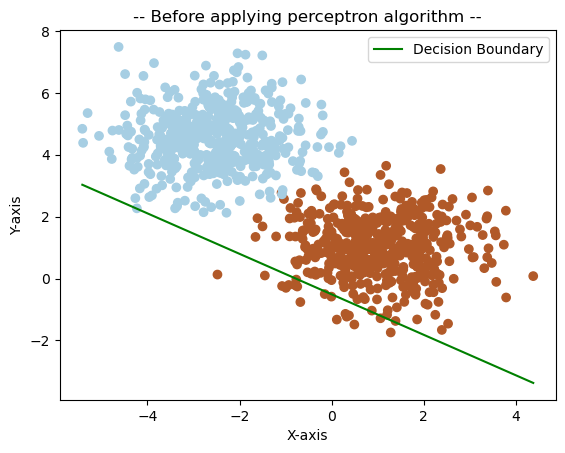

Number of changes: 2153


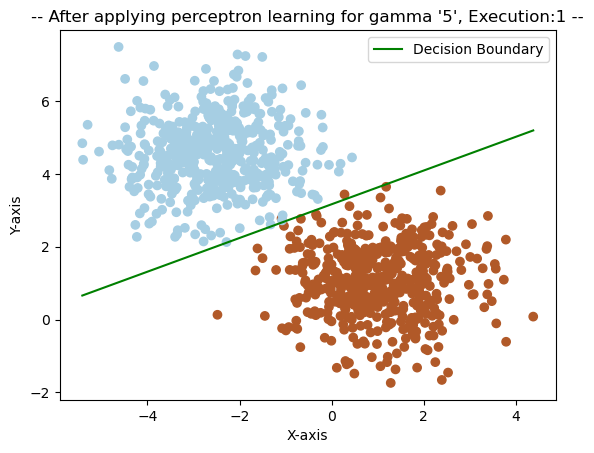

Number of changes: 2149


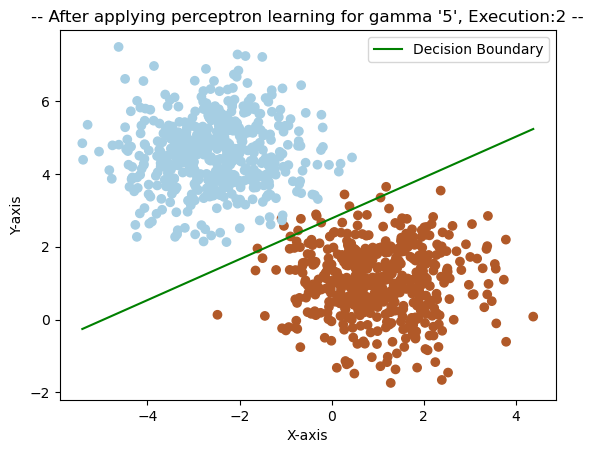

Number of changes: 2145


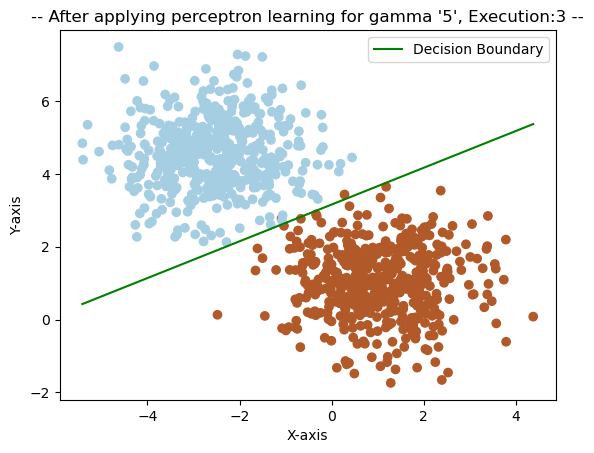

Number of changes: 2164


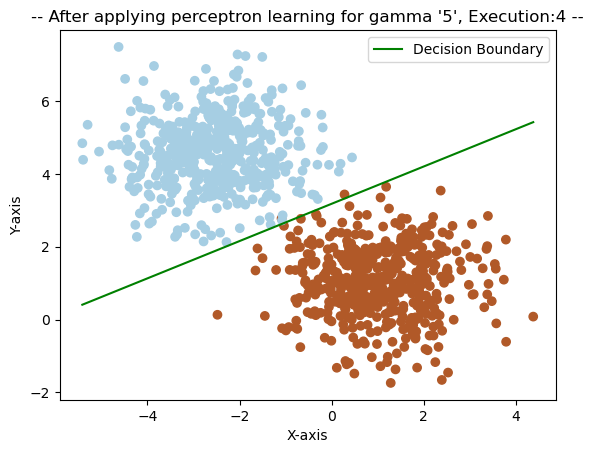

Number of changes: 2131


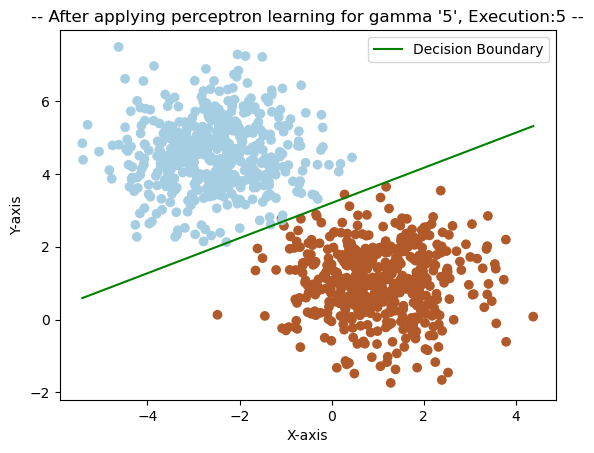

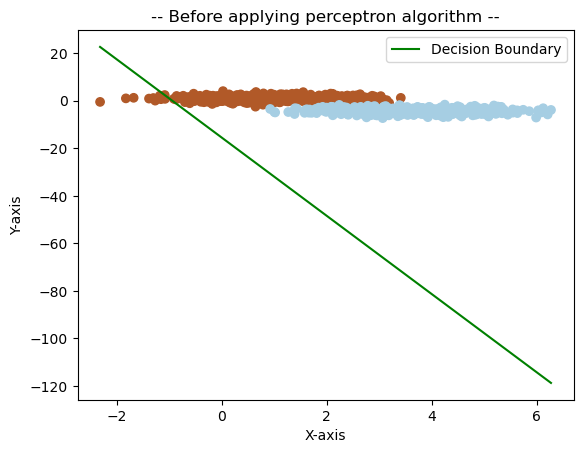

Number of changes: 30


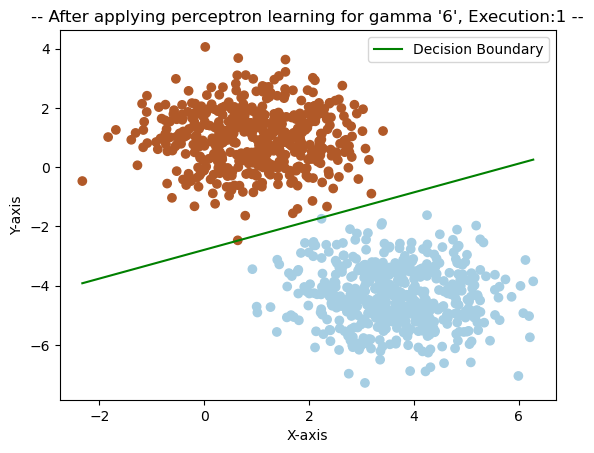

Number of changes: 45


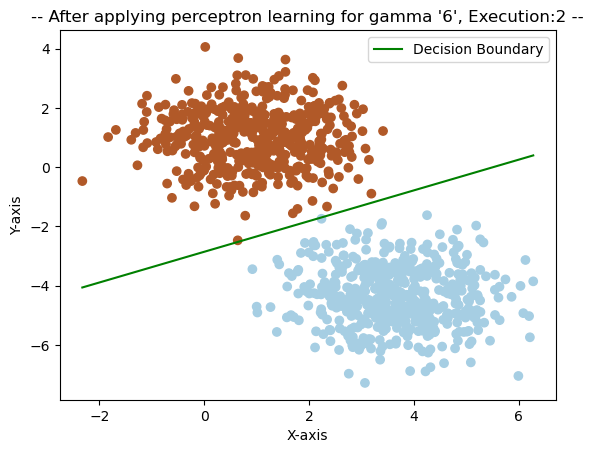

Number of changes: 41


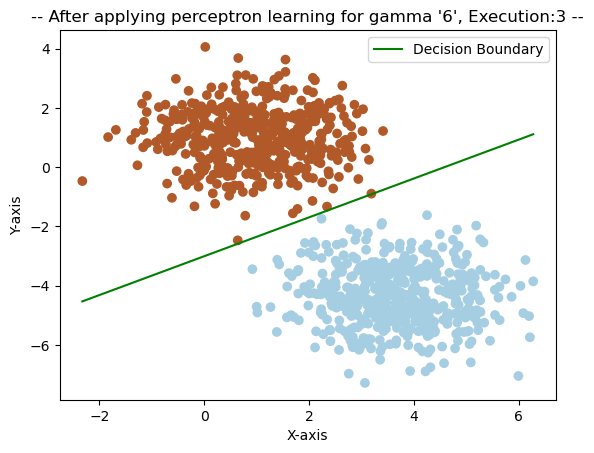

Number of changes: 84


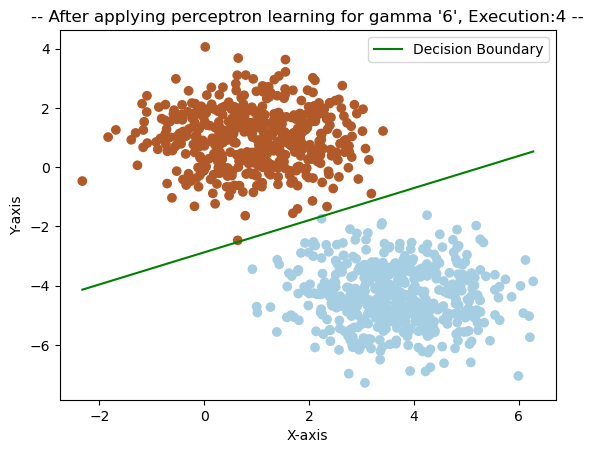

Number of changes: 51


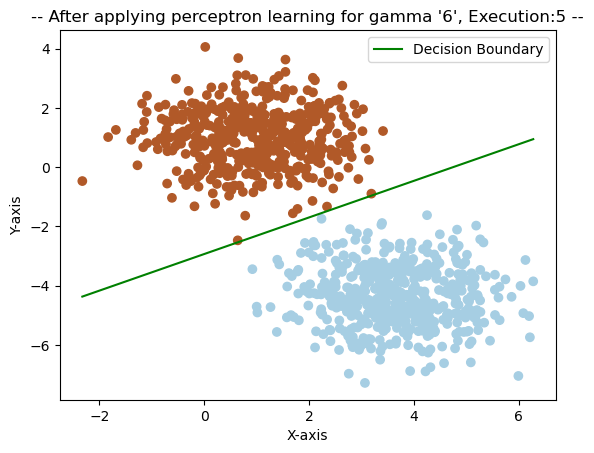

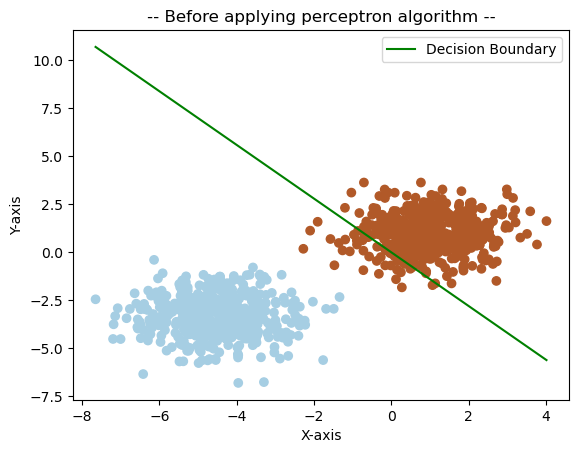

Number of changes: 11


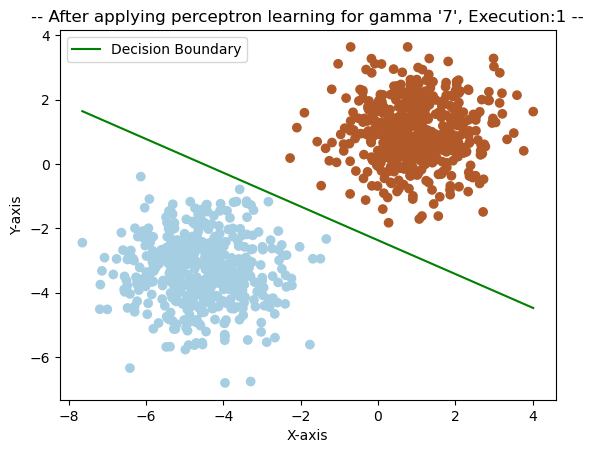

Number of changes: 16


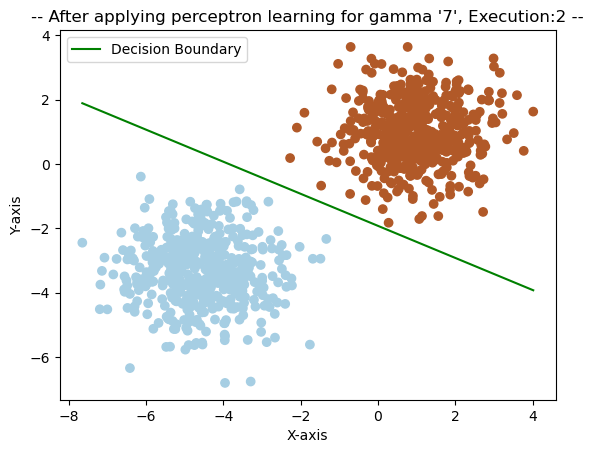

Number of changes: 6


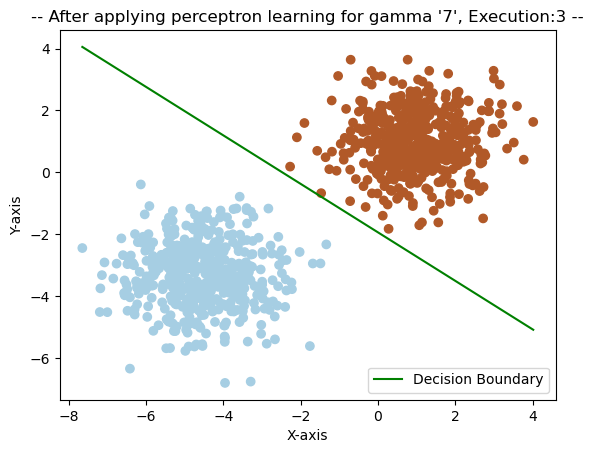

Number of changes: 5


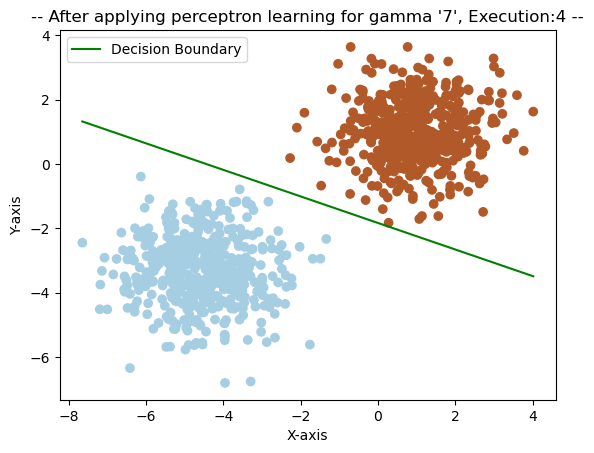

Number of changes: 13


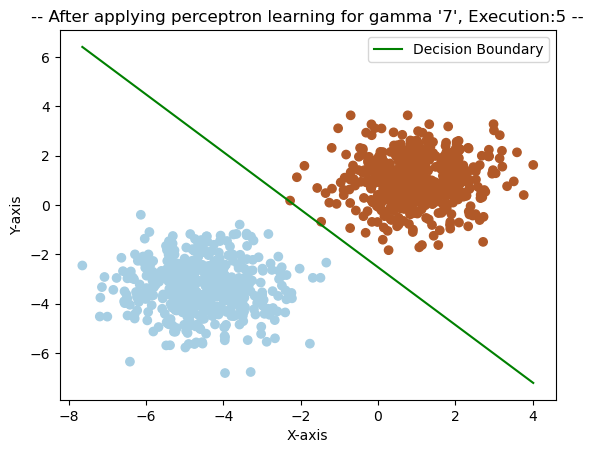

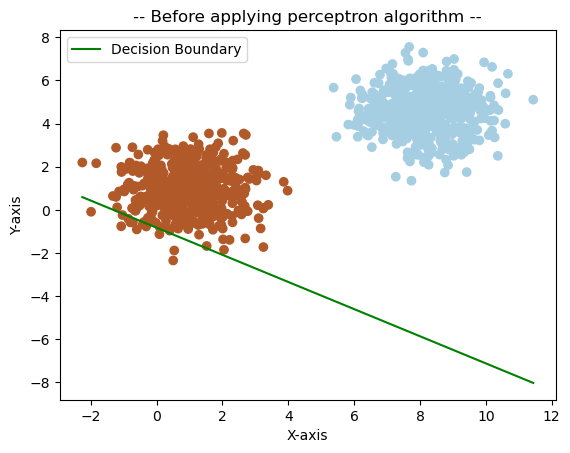

Number of changes: 89


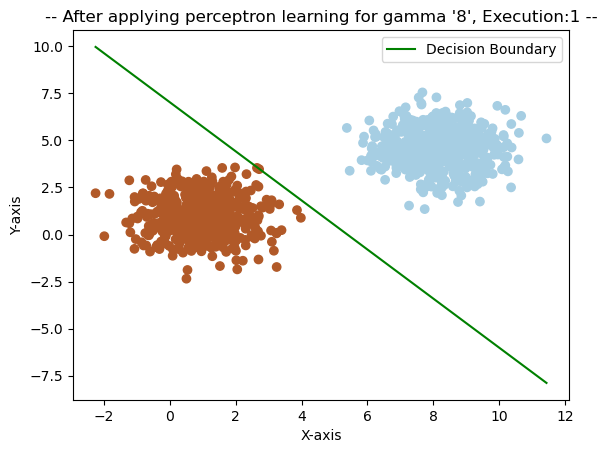

Number of changes: 94


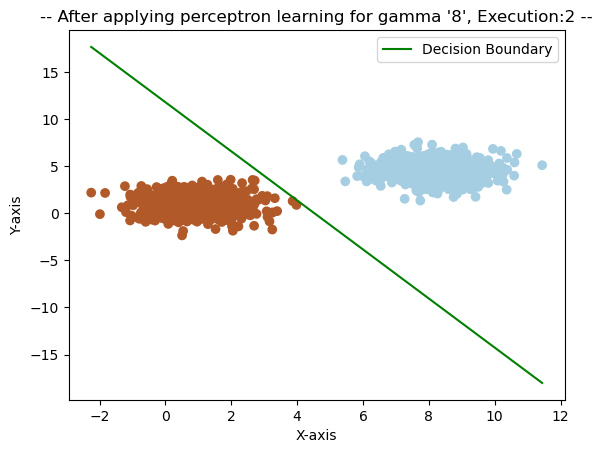

Number of changes: 14


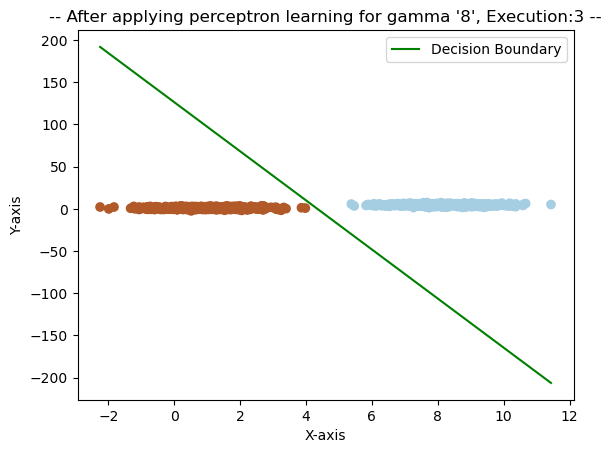

Number of changes: 84


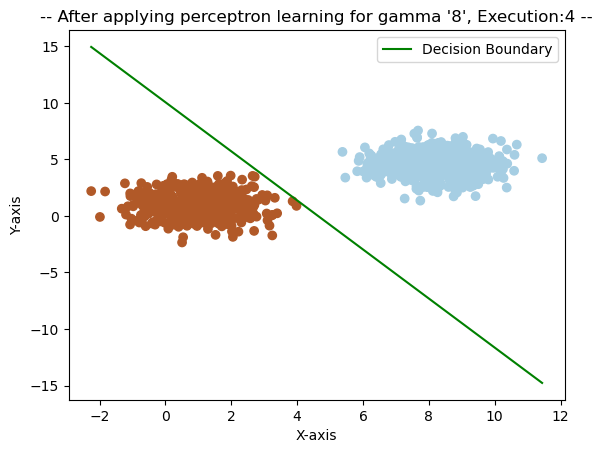

Number of changes: 85


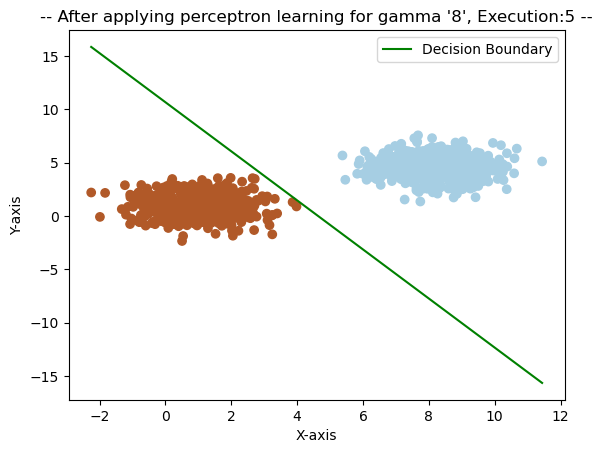

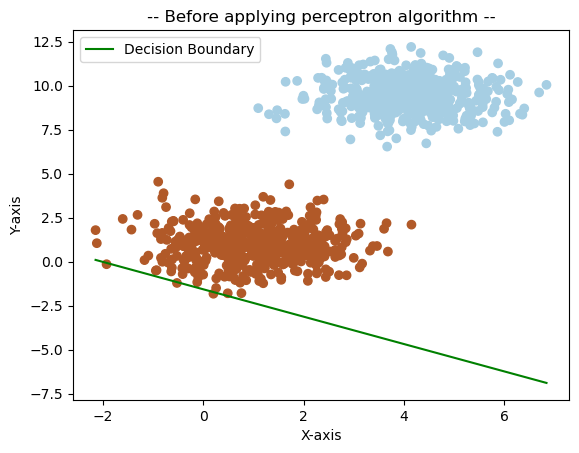

Number of changes: 44


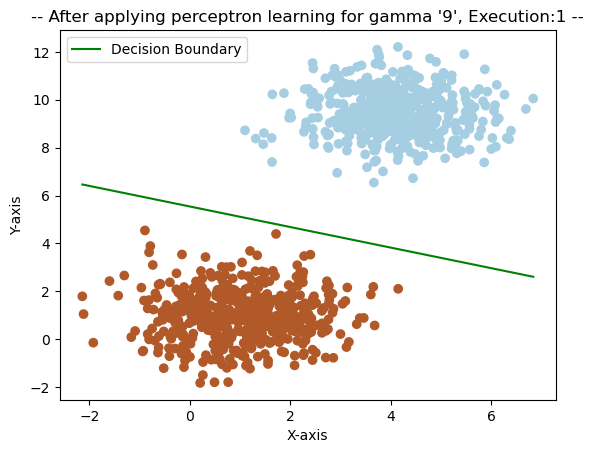

Number of changes: 54


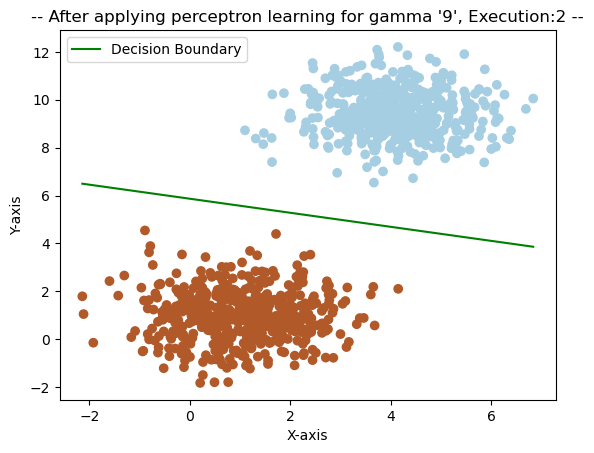

Number of changes: 32


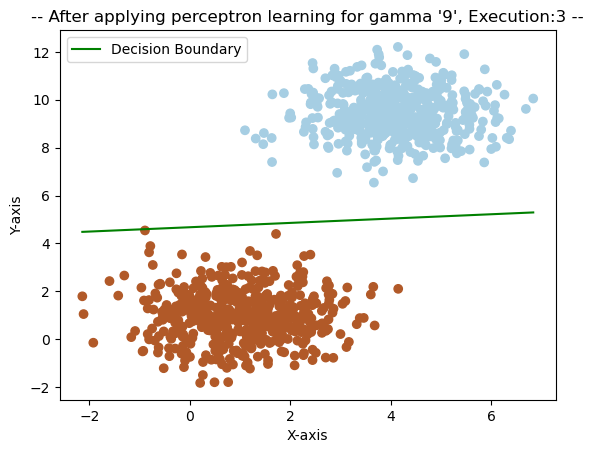

Number of changes: 41


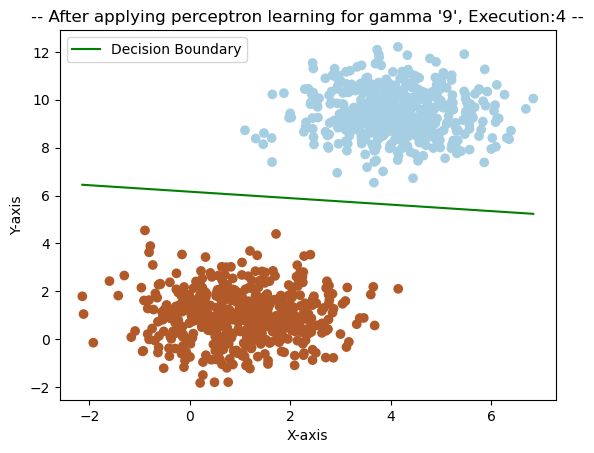

Number of changes: 42


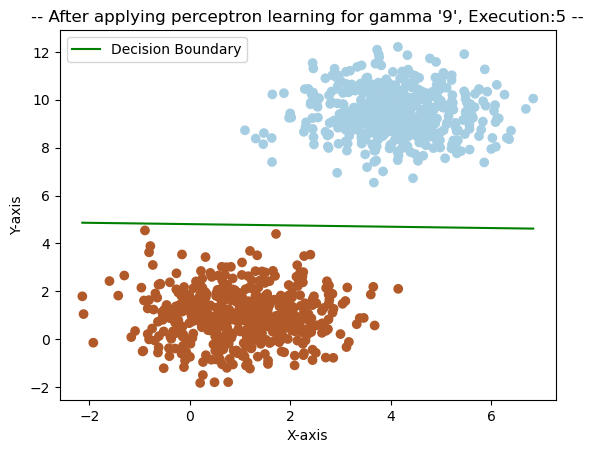

In [6]:
# Generating 5 different datasets for 5 separability values (gamma)
GAMMA_LIST = [5,6,7,8,9]
cov_matrix = [[1,0],
              [0,1]]
total_data_points = 1000
max_epochs = 1000
AVG_K_VALUES = []

for separability in GAMMA_LIST:
    X,Y = create_dataset_with_separability(cov_matrix, total_data_points, separability, 1, -1)
    
    # Initializing the weights and biases randomly
    W = np.random.uniform(low=0, high=8, size=(X.shape[1])) # X.shape[1] == Number of features in X
    b = np.random.randint(low=0, high=8)

    # Plot the dataset before training
    plot_graph_with_dec_boundary(X, Y, W, b, '-- Before applying perceptron algorithm --')
    
    temp_k = 0
    for i in range(0, 5):    
        # Applying perceptron learning algorithm
        learned_W, learned_b, k = perceptron_algorithm(X, Y, W, b, max_epochs)
        temp_k = temp_k + k
        
        # Generating random weights and biases randomly
        W = np.random.uniform(low=0, high=8, size=(X.shape[1]))
        b = np.random.randint(low=0, high=8)
        
        # Plot the dataset after training
        plot_graph_with_dec_boundary(X, Y, learned_W, learned_b, 
                                     f"-- After applying perceptron learning for gamma '{separability}', Execution:{i+1} --")
    AVG_K_VALUES.append(temp_k/5)
    print('=====================================================================================')

**Plotting Avg. K (Avg. Weight Changes required) Vs Gamma (Separability):**

Gamma Values: [5, 6, 7, 8, 9]
Avg. values of K: [2148.4, 50.2, 10.2, 73.2, 42.6]


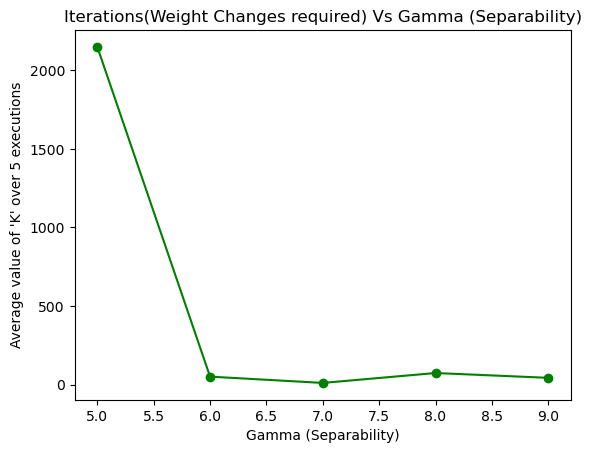

In [7]:
# Plotting Avg. K( Avg. Weight Changes required) Vs Gamma (Separability)
print('Gamma Values:', GAMMA_LIST)
print('Avg. values of K:', AVG_K_VALUES)
plt.plot(GAMMA_LIST, AVG_K_VALUES, marker='o', color='green')
plt.xlabel('Gamma (Separability)')
plt.ylabel("Average value of 'K' over 5 executions")
plt.title('Iterations(Weight Changes required) Vs Gamma (Separability)')
plt.show()

**Observation:**  
Observed that, as the value of gamma (separability) increases, the iterations required for convergence decreases.

---

**Question 2): Answer**

**1. Generating linearly separable dataset:**

In [8]:
total_num_datapoints = 1000
cov_matrix = [[1,0],
              [0,1]]
X,Y = create_dataset_with_separability(cov_matrix, total_num_datapoints, 12, 1, 0)
print('X.shape:',X.shape)
print('Y.shape:',Y.shape)

X.shape: (1000, 2)
Y.shape: (1000, 1)


In [15]:
no_of_samples, no_of_attributes = X.shape

# Initializing the weights and biases randomly
W = np.random.uniform(low=0, high=1, size=(X.shape[1], 1)) # X.shape[1] == Number of features in X
b  = 0.0

# Setting the hyperparameters
lr = 0.01
max_epochs = 10000

print('Printing the shapes of matrices:')
print('X.shape:',X.shape)
print('W.shape:',W.shape)
print('Y.shape:',Y.shape)
print("Bias 'b' is scalar value")

Printing the shapes of matrices:
X.shape: (1000, 2)
W.shape: (2, 1)
Y.shape: (1000, 1)
Bias 'b' is scalar value


**Plotting the decision boundary before training:**

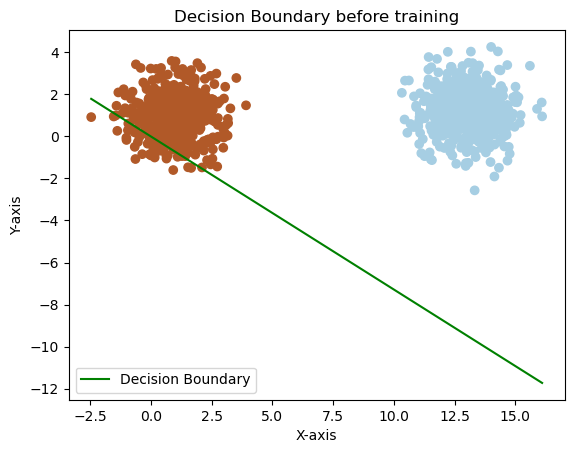

In [16]:
# Plotting the graph before training
plot_graph_with_dec_boundary(X, Y, W, b, 'Decision Boundary before training')

**2. Training using Gradient descent:**  
Using Binary Cross Entropy loass function because its binary classification problem.

In [11]:
# This method calculates and returns the loss
def compute_binary_cross_entropy_loss(Y, Y_hat):
    no_of_samples = Y.shape[0]
    return -np.sum(Y * np.log(Y_hat) + (1 - Y) * np.log(1 - Y_hat)) / no_of_samples

# This method calculates and returns the partial derivative of loss function wrt weights W
def calculate_dL_dW(X, Y, Y_hat):
    no_of_samples = Y.shape[0]
    return np.sum(np.dot(X.T, (Y_hat - Y))) / no_of_samples
    
# This method calculates and returns the partial derivative of loss function wrt bias b
def calculate_dL_db(X, Y, Y_hat):
    no_of_samples = X.shape[0]
    return np.sum(Y_hat - Y) / no_of_samples

# Function to calculate sigmoid  
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [12]:
def gradient_descent(X, Y, W, b, lr, epochs):    
    loss_list = [999]
    for epoch in range(1, epochs + 1):
        # Obtaining prediction
        Y_hat = sigmoid(np.dot(X,W)+ b)     # X@W performs matrix multiplication. Same as np.dot(X,W).
        
        # Calculating the loss
        loss = compute_binary_cross_entropy_loss(Y, Y_hat)
        if epoch % 100 == 0:
            print(f'Epoch: {epoch}, Loss: {loss}')
        
        # Comparing current epoch loss with prev_epoch loss.
        # Stopping if there is very less decrease in the loss
        # Works like 'EarlyStopping'
        if abs(loss - loss_list[-1]) <= 0.00001:
            return W, b, loss_list
        loss_list.append(loss)
        
        # Calculating gradient of loss function wrt weights and bias
        dL_dw = calculate_dL_dW(X, Y, Y_hat)
        dL_db = calculate_dL_db(X, Y, Y_hat)
       
        # Updating the weights and bias
        W = W - (lr * dL_dw)
        b = b - (lr * dL_db)
    return W, b, loss_list

**Training using Gradient Descent:**

In [17]:
# Training using Gradient Descent
print('----------- Training Started -----------------')
learned_W, learned_b, loss_list = gradient_descent(X, Y, W, b, lr, max_epochs)
print('----------- Training Ended -----------------')
print('Learned weights:',learned_W)
print('Learned bias:',learned_b)

----------- Training Started -----------------
Epoch: 100, Loss: 0.4099170740121466
Epoch: 200, Loss: 0.3651899124814361
Epoch: 300, Loss: 0.3276295480125172
Epoch: 400, Loss: 0.2959532758015615
Epoch: 500, Loss: 0.2690886071912843
Epoch: 600, Loss: 0.24615824414494167
Epoch: 700, Loss: 0.2264533311598458
Epoch: 800, Loss: 0.2094044059927769
Epoch: 900, Loss: 0.1945546024991793
Epoch: 1000, Loss: 0.1815367985939579
Epoch: 1100, Loss: 0.17005494313648978
Epoch: 1200, Loss: 0.15986915933524387
Epoch: 1300, Loss: 0.15078401581086232
Epoch: 1400, Loss: 0.14263935061709337
Epoch: 1500, Loss: 0.1353031074939187
Epoch: 1600, Loss: 0.12866573899953399
Epoch: 1700, Loss: 0.12263582250309411
Epoch: 1800, Loss: 0.11713661315379617
Epoch: 1900, Loss: 0.11210332114993551
Epoch: 2000, Loss: 0.10748095022386255
Epoch: 2100, Loss: 0.103222572502451
Epoch: 2200, Loss: 0.09928794411738347
Epoch: 2300, Loss: 0.09564238815501319
Epoch: 2400, Loss: 0.0922558884048592
Epoch: 2500, Loss: 0.08910235018456356


**Plotting decision boundary after training:**

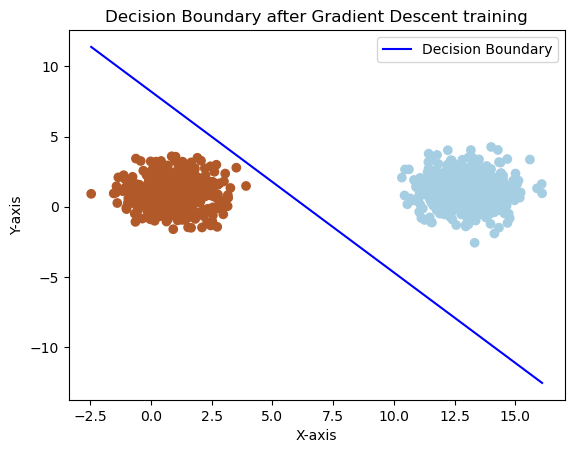

In [18]:
# Plotting the graph after training
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.Paired, marker='o')
x_values = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
y_values = -(learned_W[0] * x_values + learned_b) / learned_W[1]
plt.plot(x_values, y_values, color='blue', label='Decision Boundary')
plt.title('Decision Boundary after Gradient Descent training')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

**Plotting the loss:**

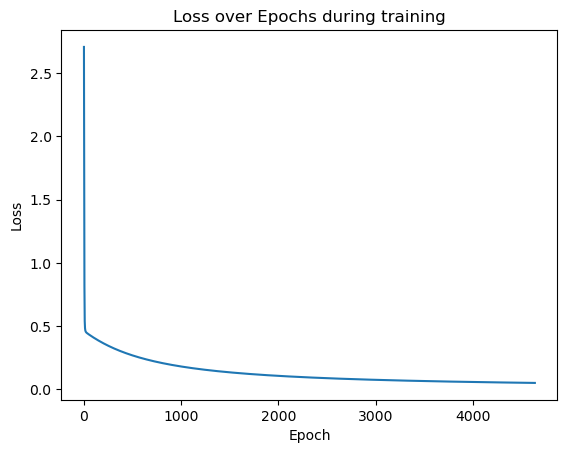

In [19]:
# Plotting the epochs Vs loss
plt.plot(np.arange(1, len(loss_list)), loss_list[1:])
# Adding labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs during training')
# Display the plot
plt.show()

---

**Question 3): Answer**

In [20]:
# Importing the necessary packages
import numpy as np
import matplotlib.pyplot as plt

**Utility functions:**

In [21]:
# Utility function to plot the dataset
def plot_graph(X, Y, title):
    plt.scatter(X[:, 0], X[:, 1], cmap=plt.cm.autumn, c=Y)
    plt.title(title)
    plt.xlabel('First feature')
    plt.ylabel('Second feature')
    plt.show()

**Generating 2 concentric circle dataset:**

-------- Printing dataset shape -------
X.shape: (200, 2)
Y.shape: (200, 1)


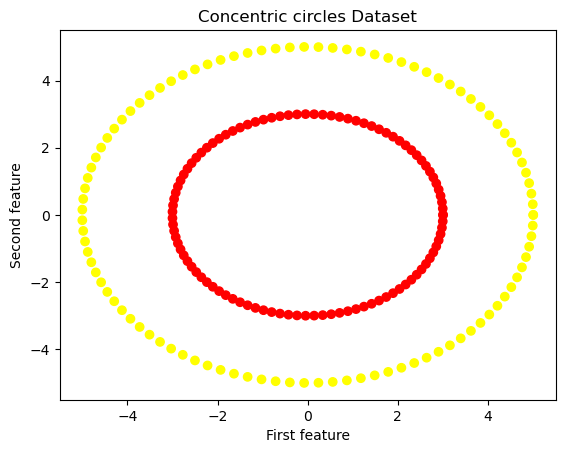

In [22]:
def generate_concentric_circles(num_samples):
    # Creating 'num_samples' theta values
    theta = np.linspace(0, 2 * np.pi, num_samples)
    # Deciding radius values for inner and outer circles
    radii = np.array([3, 5])

    circles = []
    for radius in radii:
        circles.append(np.column_stack((radius * np.cos(theta), radius * np.sin(theta))))

    X = np.vstack(circles)
    Y = np.concatenate([np.zeros(num_samples), np.ones(num_samples)])
    return X, Y

# Creating the dataset having 2 concentric circles
X, Y = generate_concentric_circles(100)
Y = Y.reshape(-1, 1)
print('-------- Printing dataset shape -------')
print('X.shape:', X.shape)
print('Y.shape:', Y.shape)
plot_graph(X, Y, 'Concentric circles Dataset')

**Creating Multilayer Neural Network:**

**Notations:**  
dL_W1 represents gradient of loss function (L) w.r.t weight W1  
dL_b1 represents gradient of loss function (L) w.r.t bias b1  
dL_W2 represents gradient of loss function (L) w.r.t weight W2  
dL_b2 represents gradient of loss function (L) w.r.t bias b2  

**NN architecture:**  
- Used ReLU activation in hidden layer
- Used sigmoid activation in output layer (which is more relevant for binary classification)

In [23]:
loss_list = []
class Neural_Network:
    def __init__(self, input_layer_size, hidden_layer_size, output_layer_size):
        self.input_layer_size = input_layer_size
        self.hidden_layer_size = hidden_layer_size
        self.output_layer_size = output_layer_size
        self.W1, self.b1, self.W2, self.b2 = self.initialize_parameters()
        print('----------- Weights and bias shapes ---------')
        print('W1.shape:', self.W1.shape)
        print('b1.shape:', self.b1.shape)
        print('W2.shape:', self.W2.shape)
        print('b2.shape:', self.b2.shape)
        print('----------------------------------------------')

    # Randomly initializing the weghts and biases
    def initialize_parameters(self):
        np.random.seed(42)
        W1 = np.random.randn(self.input_layer_size, self.hidden_layer_size)
        b1 = np.zeros((1, self.hidden_layer_size))
        W2 = np.random.randn(self.hidden_layer_size, self.output_layer_size)
        b2 = np.zeros((1, self.output_layer_size))
        return W1, b1, W2, b2

    def calculate_sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))
    
    def calculate_relu(self, Z):
        return np.maximum(0, Z)

    # Calculates derivative of ReLU
    def calculate_relu_derivative(self, Z):
        return (Z > 0).astype(float) if isinstance(Z, np.ndarray) else float(Z > 0)

    # A @ B == np.dot(A,B) == Matrix multiplication
    def forward_propagation(self, X):
        self.Z1 = X @ self.W1 + self.b1
        # Applying relu in hidden layer
        self.A1 = self.calculate_relu(self.Z1)
        self.Z2 = self.A1 @ self.W2 + self.b2
        # Applying sigmoid which is better suited for binary classification
        self.A2 = self.calculate_sigmoid(self.Z2)

    def compute_BCE_loss(self, Y):
        no_of_samples = Y.shape[0]
        return -np.sum(Y * np.log(self.A2) + (1 - Y) * np.log(1 - self.A2)) / no_of_samples   
    
    # A @ B == np.dot(A,B) == A.dot(B) == Matrix multiplication
    def backward_propagation(self, X, y):
        no_of_samples = X.shape[0]
        # Calculating gradients dL_W1, dL_b1, dL_W2, dL_b2
        dL_Z2 = self.A2 - Y
        self.dL_W2 = (self.A1.T @ dL_Z2) / no_of_samples
        self.dL_b2 = np.sum(dL_Z2, axis=0, keepdims=True) / no_of_samples
        dL_Z1 = (dL_Z2 @ self.W2.T) * self.calculate_relu_derivative(self.Z1)
        self.dL_W1 = (X.T @ dL_Z1) / no_of_samples
        self.dL_b1 = np.sum(dL_Z1, axis=0, keepdims=True) / no_of_samples
    
    def update_model_parameters(self, lr):
        self.W1 = self.W1 - (lr * self.dL_W1)
        self.b1 = self.b1 - (lr * self.dL_b1)
        self.W2 = self.W2 - (lr * self.dL_W2)
        self.b2 = self.b2 - (lr * self.dL_b2)

    def fit_model(self, X, Y, lr, epochs):
        for ep in range(0, epochs, 1):
            # Perform forward propagation
            self.forward_propagation(X)
            
            # Calculate loss
            loss = self.compute_BCE_loss(Y)
            loss_list.append(loss)
            
            # Perform backward propagation
            self.backward_propagation(X, Y)
            
            # Update parameters
            self.update_model_parameters(lr)

            # Printing loss after every interval of 1000 epochs
            if (ep % 500) == 0:
                print(f'Epoch: {ep}, Loss: {loss}')
        print('----------------------------------------------')
                
    def predict(self, X):
        self.forward_propagation(X)
        # Taking 0.5 as the threshold, for bianary classification
        predictions = (self.A2 > 0.5).astype(int)
        return predictions

**Fitting the MLP model and obtaining predictions:**

----------- Weights and bias shapes ---------
W1.shape: (2, 10)
b1.shape: (1, 10)
W2.shape: (10, 1)
b2.shape: (1, 1)
----------------------------------------------
Epoch: 0, Loss: 5.389072573688899
Epoch: 500, Loss: 0.6058734645668887
Epoch: 1000, Loss: 0.542761788763938
Epoch: 1500, Loss: 0.49547147653957707
Epoch: 2000, Loss: 0.4500523120882321
Epoch: 2500, Loss: 0.399809936564268
Epoch: 3000, Loss: 0.3554947894104626
Epoch: 3500, Loss: 0.3175965190202683
Epoch: 4000, Loss: 0.28058158245513254
Epoch: 4500, Loss: 0.2464096546149842
----------------------------------------------


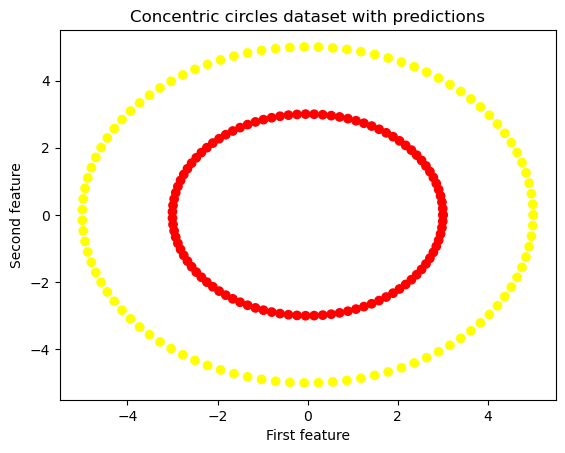

In [24]:
no_of_features = X.shape[1]
# Taking only 1 neuron in output layer, beacuse applying sigmoid activation in in output layer
nn = Neural_Network(input_layer_size=no_of_features, hidden_layer_size=10, output_layer_size=1)

# Fitting the model
nn.fit_model(X, Y, lr=0.01, epochs=5000)

# Make predictions
predictions = nn.predict(X)

# Plotting the predictions
plot_graph(X=X, Y=predictions.flatten(), title='Concentric circles dataset with predictions')

**Plotting the loss:**

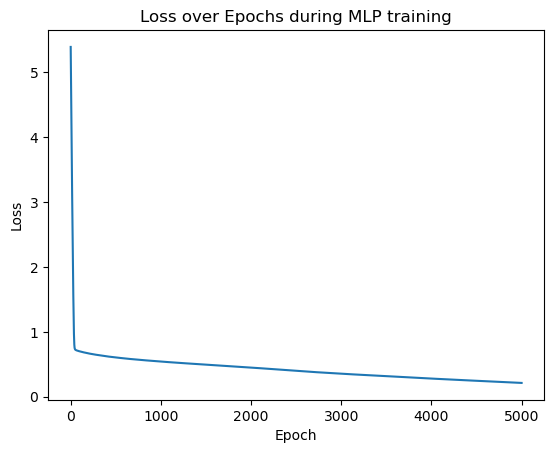

In [25]:
# Plotting the epochs Vs loss
plt.plot(np.arange(0, len(loss_list)), loss_list)
# Adding labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs during MLP training')
# Display the plot
plt.show()

---